In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

Read data

In [34]:
# select the crop
#CROP = 'wheat'
CROP = 'corn'
#CROP = 'soybeans'

dataold = pd.read_csv(CROP + '.csv')
data = pd.read_csv(CROP + '_barchart_new.csv')
columnlist = data.columns.values.tolist()
newdf = pd.concat([data, dataold], ignore_index=True)

Generating plots

In [13]:
def contractPlots(df, year, month):
    print("Contract plots for {}/{}".format(year, month))
    row = df[(df['year'] == year) & (df['month'] == month)]

    plt.rcParams["figure.figsize"]=20,15
    plt.subplot(4, 1, 1)
    plt.plot(row['day'], row['close_net'], 'r-', label="close")
    plt.plot(row['day'], row['open_net'], 'b-', label='open')
    plt.grid(b=True, which='major')
    plt.ylabel('Net')
    plt.title('Price')
    plt.legend()
    
    plt.subplot(4, 1, 2)
    plt.plot(row['day'], row['close_rel'], 'r-', label="close")
    plt.plot(row['day'], row['open_rel'], 'b-', label='open')
    plt.grid(b=True, which='major')
    plt.ylabel('Relative')
    plt.title('Price')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(row['day'], row['volume'], 'b-')
    plt.grid(b=True, which='major')
    plt.ylabel('Contracts')
    plt.title('Volume')

    plt.subplot(4, 1, 4)
    plt.plot(row['day'], row['openint'], 'b-')
    plt.grid(b=True, which='major')
    plt.ylabel('Contracts')
    plt.title('Open Interest')
    plt.show()

In [14]:
def yearPlots(df, year):
    yeardata = df[df['year'] == year]
    months = yeardata['month'].unique()
    for month in months:
        contractPlots(data, year, month)

In [15]:
def findanomaly(data, col, month):
    _df = data[data['month'] == month]
    years = pd.unique(_df['year'])
    columnlist = _df.columns.values.tolist()
    #newdf = pd.DataFrame(columns = columnlist)
    for year in years:
        _df2 = _df[_df['year']==year]
        if col == 'close_net':
            diff = _df2['close_net'].max() - _df2['close_net'].min()
            if _df2['close_net'].max()>=250 or _df2['close_net'].min()<=-200 or diff>=400:
                #newdf.append(_df2)
                plt.plot(_df2['day'], _df2[col], label = year)
                plt.legend(loc='lower right')
        elif col == 'close_rel':
            diff = _df2['close_rel'].max() - _df2['close_rel'].min()
            if _df2['close_rel'].max()>=1.6 or _df2['close_rel'].min()<=0.7 or diff>=2.2:
                #newdf.append(_df2)
                plt.plot(_df2['day'], _df2[col], label = year)
                plt.legend(loc='lower right')
#plt.plot(x, y1, label = "Alice")
            

In [26]:
def allYears(data, col, month):
    _df = data[data['month'] == month]
    years = pd.unique(_df['year'])
    for year in years:
        _df2 = _df[_df['year']==year]
        plt.plot(_df2['day'], _df2[col])

In [17]:
def overallStats(dfin, month, days=200):
    meanlist = []
    rellist = []
    varlist = []
    vollist = []
    openintlist = []
    days = range(days)

    df = dfin[dfin['month']==month]
    for i in days:
        meanlist.append(df[df['day']==i]['close_net'].mean())
        rellist.append(df[df['day']==i]['close_rel'].mean())
        varlist.append(df[df['day']==i]['close_net'].var())
        vollist.append(df[df['day']==i]['volume'].mean())
        openintlist.append(df[df['day']==i]['openint'].mean())

    #plt.rcParams["figure.figsize"]=20,25

    plt.subplot(5, 1, 1)
    plt.plot(days, meanlist, 'g-')
    plt.grid(b=True, which='major')
    plt.title('Close - Mean')
    plt.ylabel('Net')

    plt.subplot(5, 1, 2)
    plt.plot(days, varlist, 'b-')
    plt.grid(b=True, which='major')
    plt.title('Net Close - Var')
    plt.ylabel('Variance')

    plt.subplot(5, 1, 3)
    plt.plot(days, rellist, 'g-')
    plt.grid(b=True, which='major')
    plt.title('Relative Close - Mean')
    plt.ylabel('Relative')

    plt.subplot(5, 1, 4)
    plt.plot(days, vollist, 'b-')
    plt.grid(b=True, which='major')
    plt.title('Volume')
    plt.ylabel('Contracts')

    plt.subplot(5, 1, 5)
    plt.plot(days, openintlist, 'b-')
    plt.grid(b=True, which='major')
    plt.title('Openint')
    plt.ylabel('Contracts')

Contract plots for 2003/3


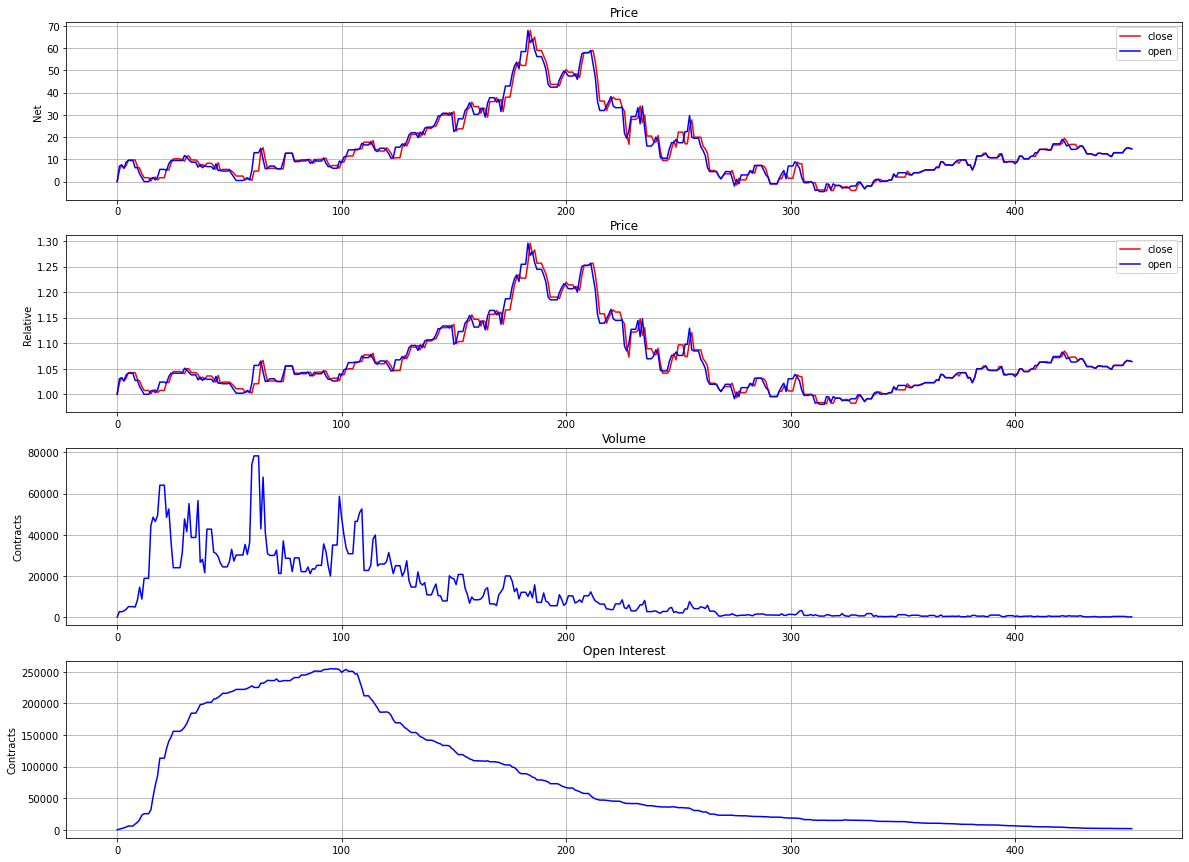

In [18]:
year = 2003
month = 3
contractPlots(data, year, month)

contract plots for a year

Contract plots for 2003/3


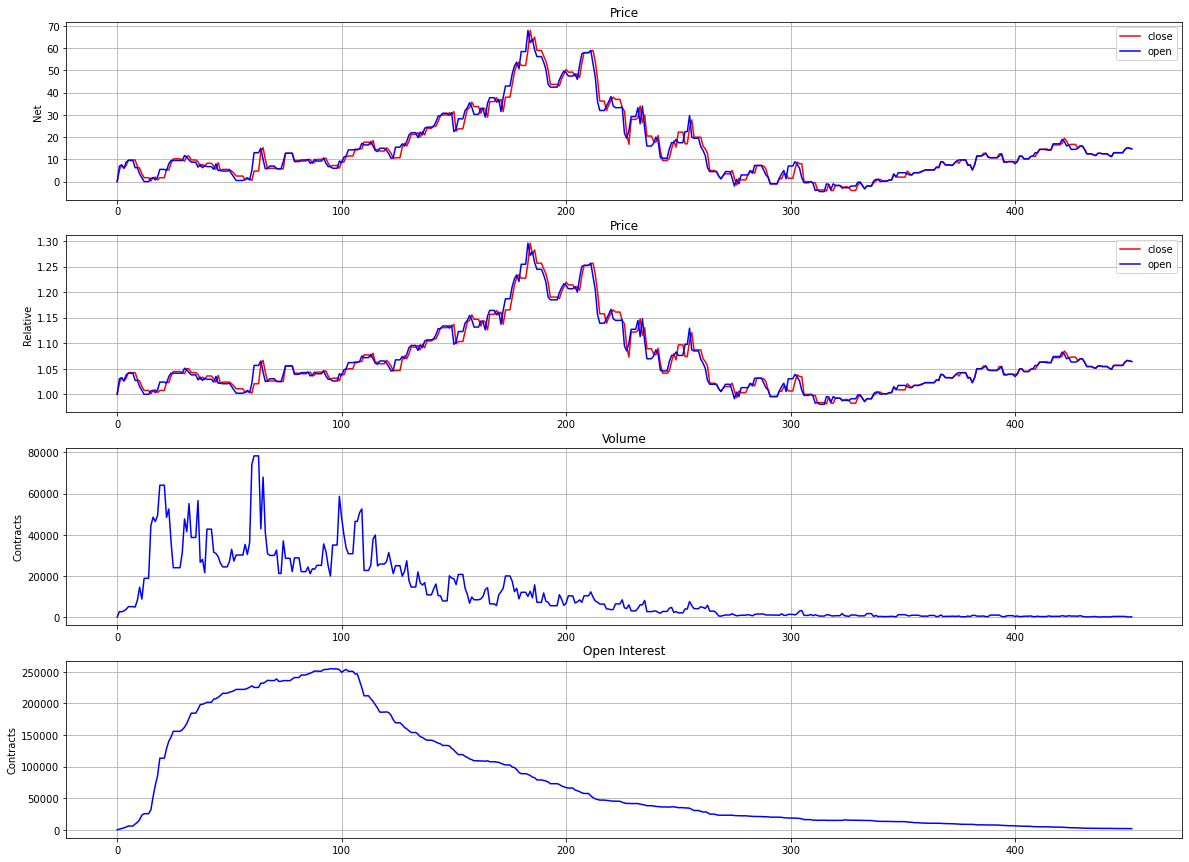

Contract plots for 2003/5


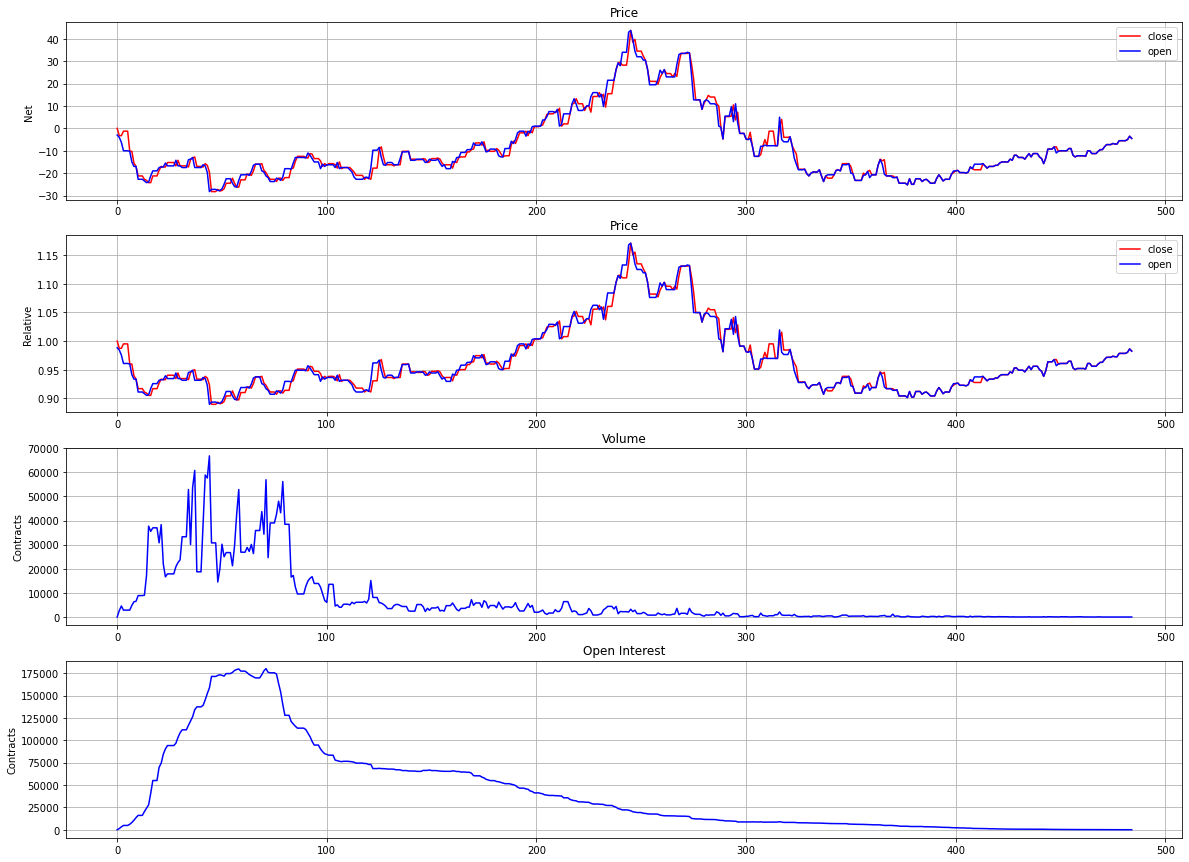

Contract plots for 2003/7


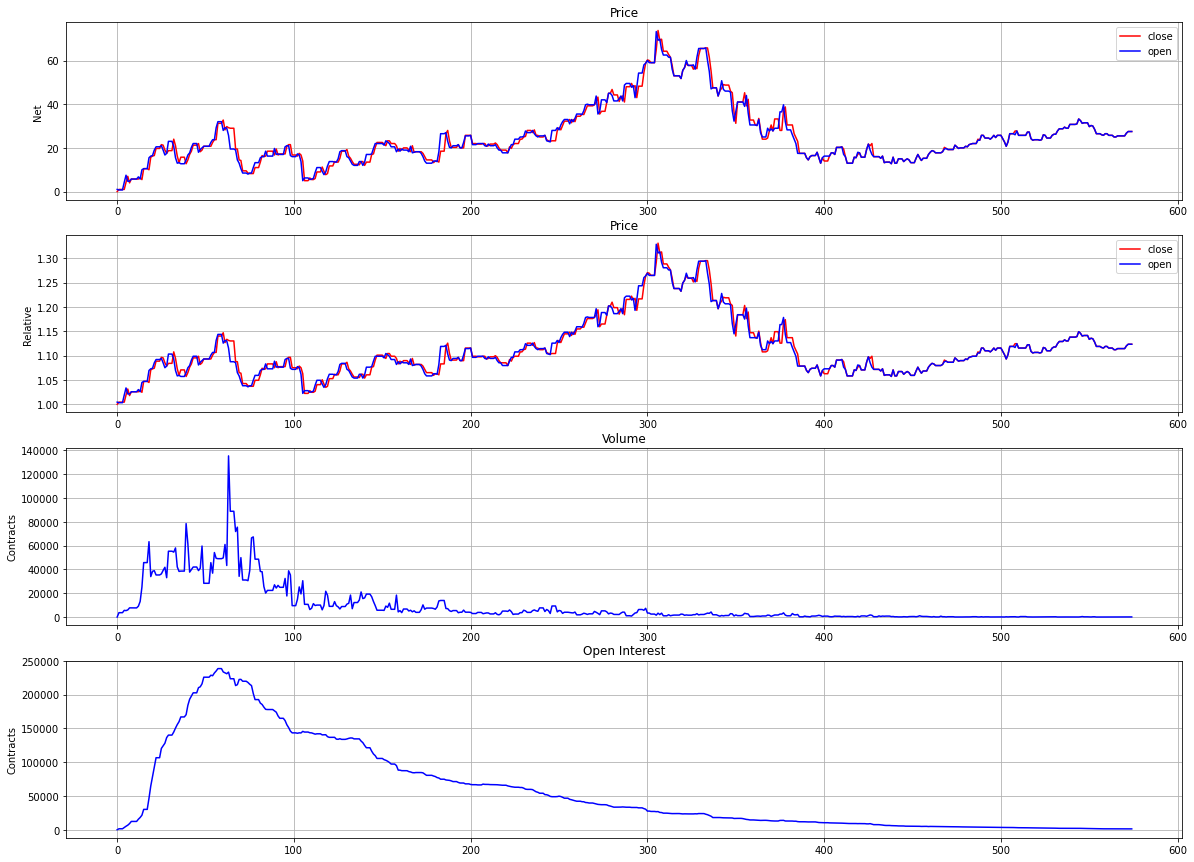

Contract plots for 2003/9


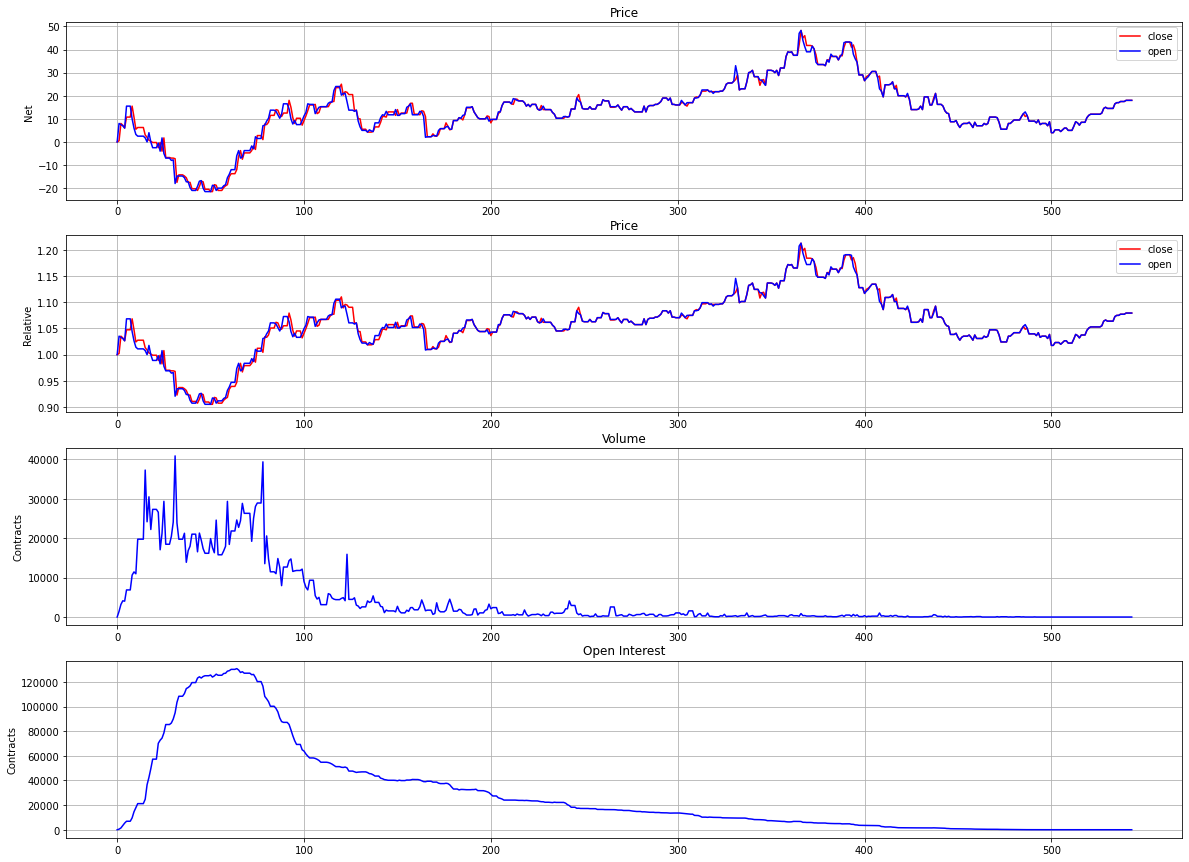

Contract plots for 2003/12


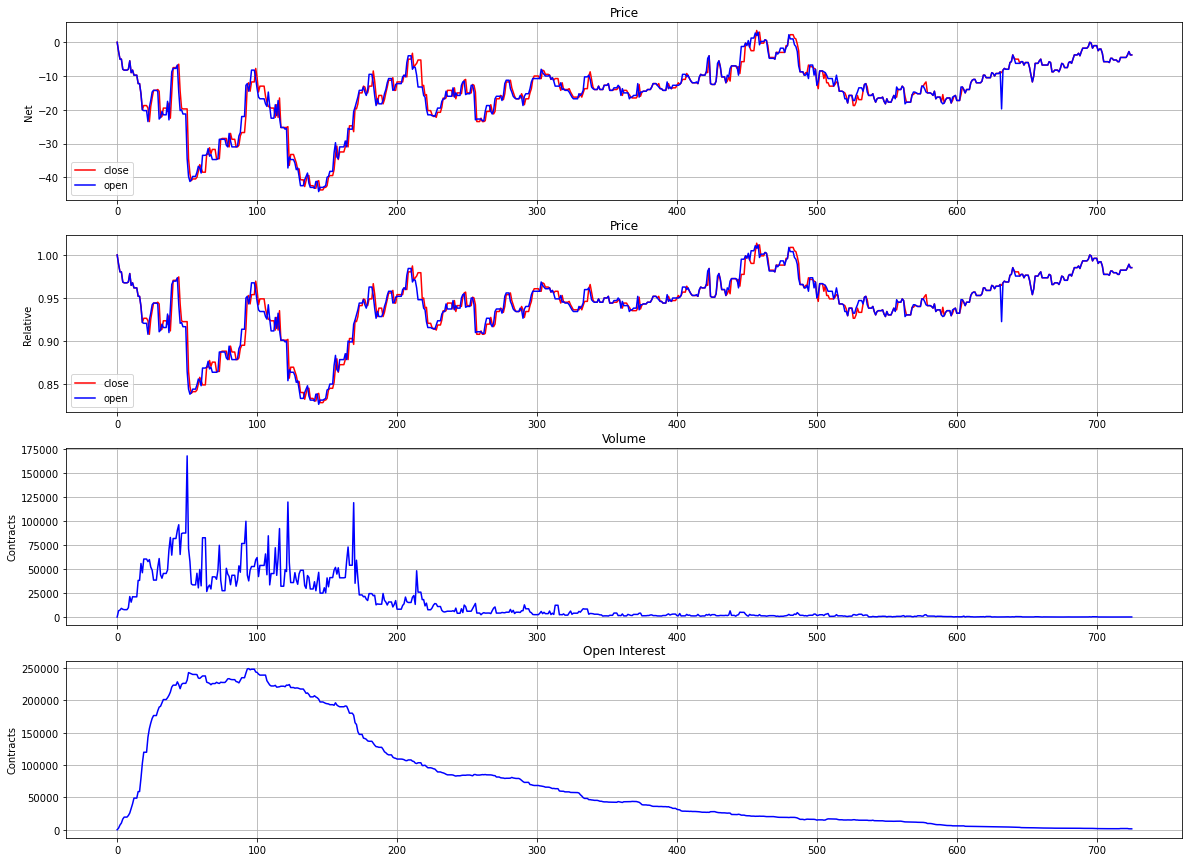

In [19]:
yearPlots(data, 2003)

All years: net close

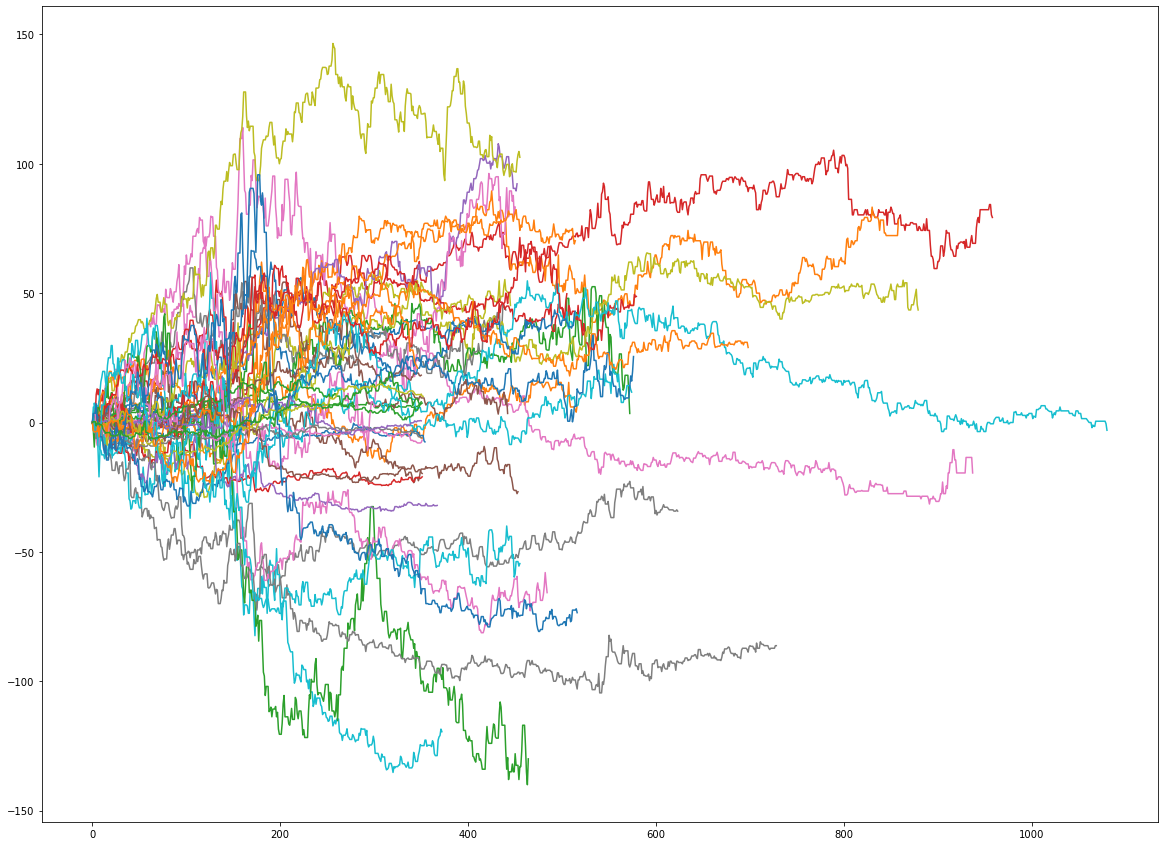

In [31]:
month = 12
allYears(dataold, 'close_net', month)

All years: relative close

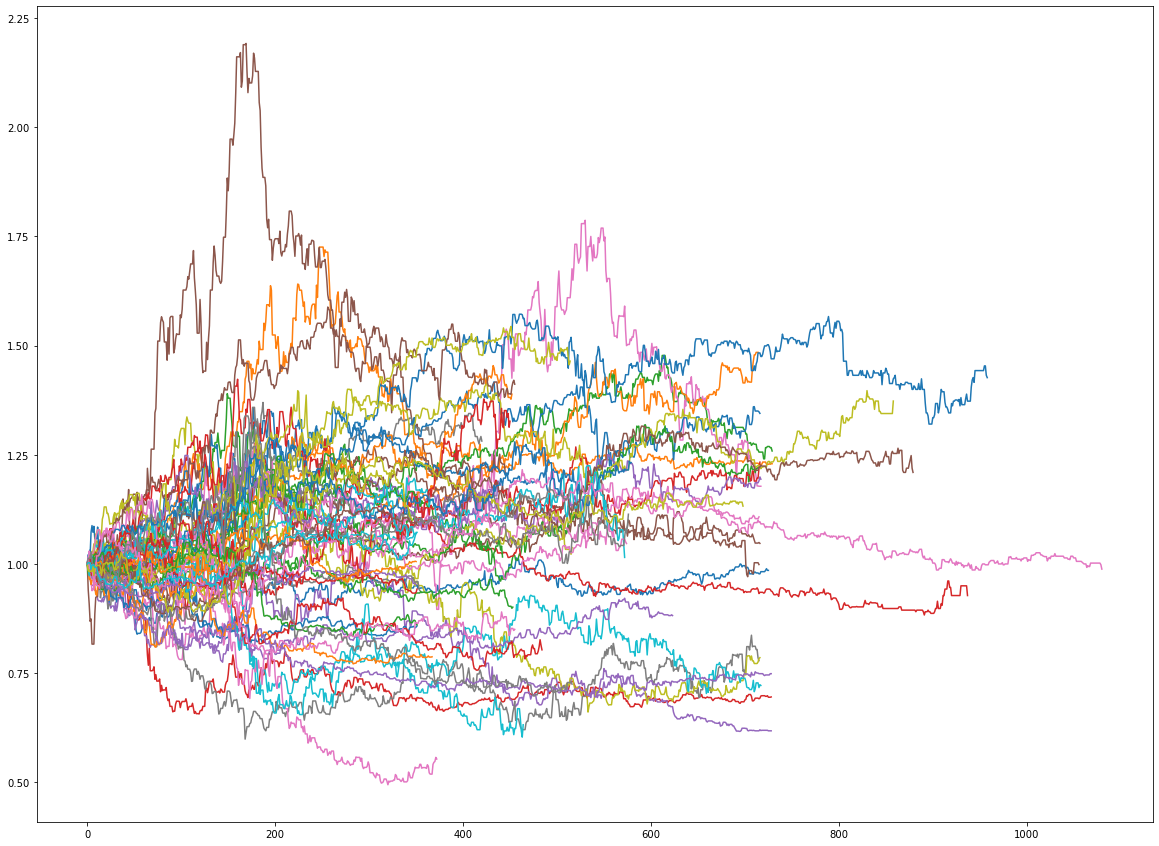

In [32]:
month = 12
allYears(newdf, 'close_rel', month)

Overall statistics
The plots below show the aggregate (mean or variance) of all years by day. For example, at 200 on the x-axis, we see the average of all net close prices 200 days before the contract end.

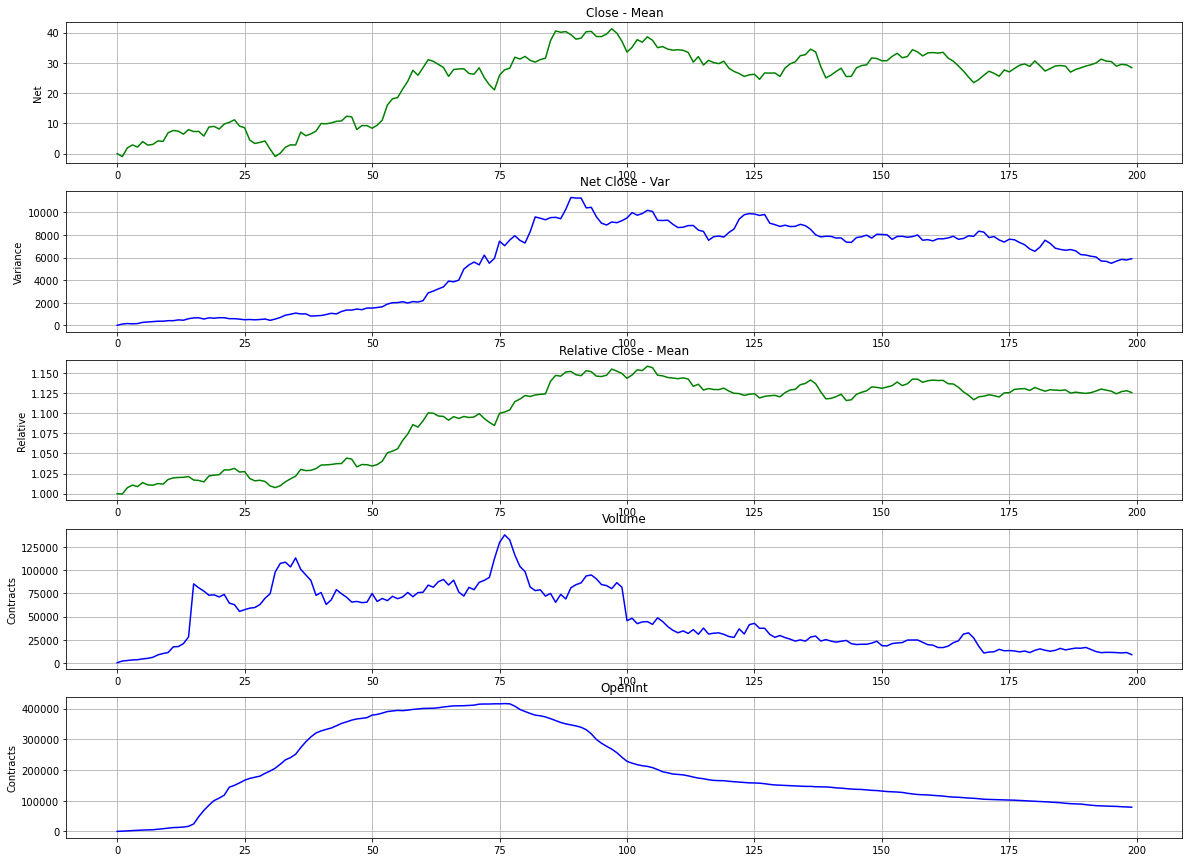

In [23]:
overallStats(data, 9)

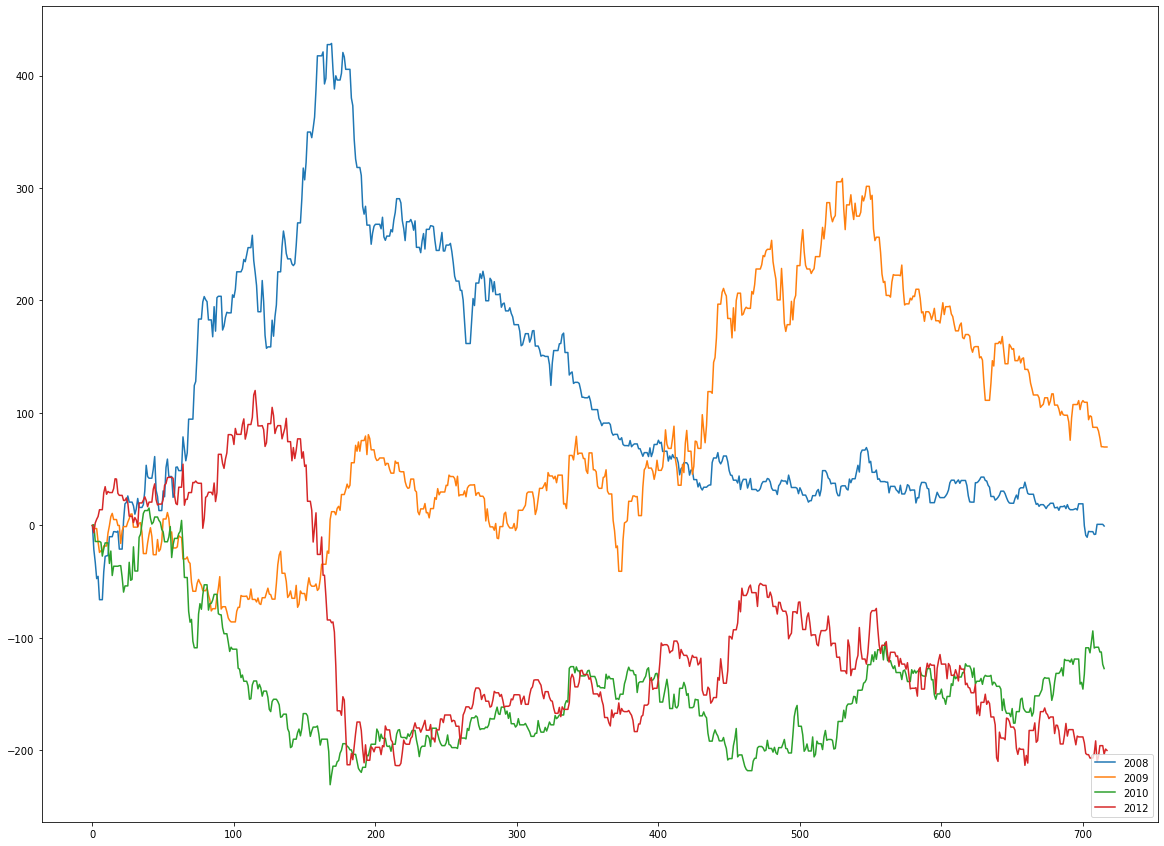

In [25]:
month = 12
findanomaly(data, 'close_net', month)

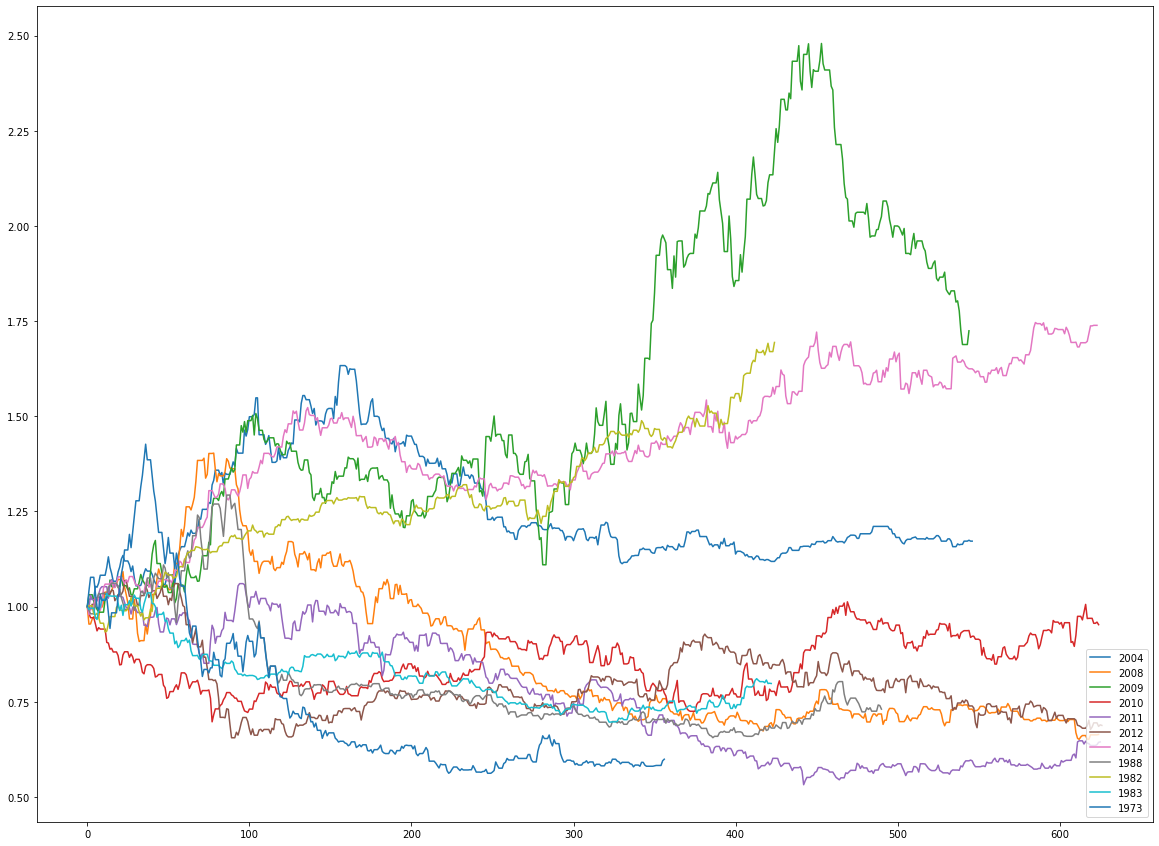

In [33]:
month=9
findanomaly(newdf, 'close_rel', month)